# Effects of socio-economics changes on population suicide rates

## Investigation Overview

In this investigation, I wanted to look at the characteristics of df that could be used to predict their prices. The main focus was on the four Cs of df: carat (weight), cut grade, color grade, and clarity grade.

## Dataset Overview

The data consisted of prices and attributes of approximately 54,000 round-cut df. The attributes included the four Cs of df, as well as additional measurements such as table, depth, and dimensions. Thirty-nine data points were removed from the analysis due to inconsistencies or missing information.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('master.csv')

In [ ]:
#Rename some columns of the dataframe
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


## ***Distribution of suicides number***

suicides number in the dataset does not take on a very large range of values.

``



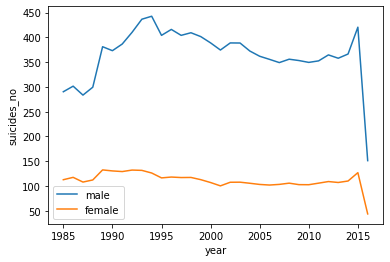

In [ ]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

# ***Distribution of age***
It seems that the suicide rate to 75+ years is the highest

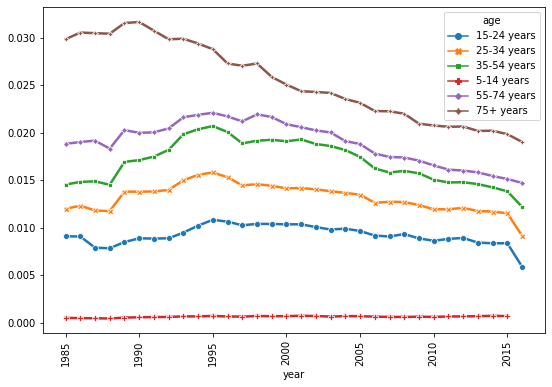

In [ ]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

# ***Distribution of country***

In [ ]:
df_age = df.groupby(["country"])["suicides_no", "population"].sum()
df_country = df_age.copy().reset_index()
df_country

,country,suicides_no,population
0,Albania,1970,62325467
1,Antigua and Barbuda,11,1990228
2,Argentina,82219,1035985431
3,Armenia,1905,77348173
4,Aruba,101,1259677
...,...,...,...
96,United Arab Emirates,622,36502275
97,United Kingdom,136805,1738767780
98,United States,1034013,8054027201
99,Uruguay,13138,84068943


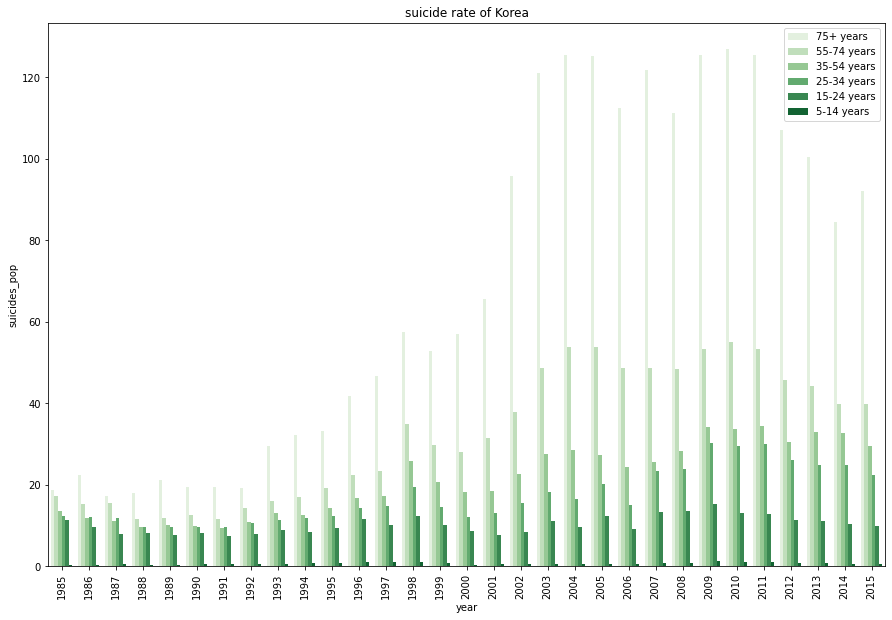

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Republic of Korea"]) , palette = 'Greens' )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()    
plt.show()

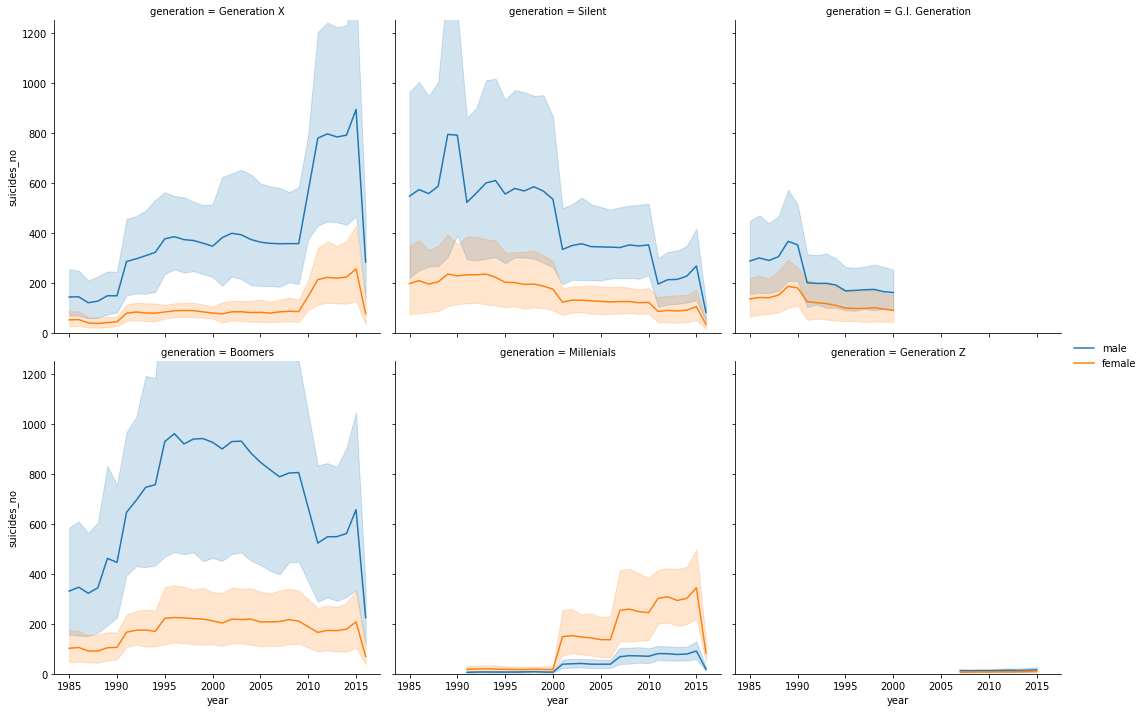

In [ ]:
g = sns.FacetGrid(df, col="generation", height=5, col_wrap=3)
#g.map_dataframe(sns.scatterplot, x="year", y="suicides_no", hue="sex")
g.map_dataframe(sns.lineplot , x="year", y="suicides_no", hue="sex")
plt.ylim(0, 1250)
g.add_legend()